<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/AssociationRulesAssgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [7]:
df= pd.read_csv("groceries.csv",error_bad_lines=False)

b'Skipping line 6: expected 4 fields, saw 5\nSkipping line 8: expected 4 fields, saw 5\nSkipping line 11: expected 4 fields, saw 5\nSkipping line 12: expected 4 fields, saw 9\nSkipping line 24: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 11\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 32: expected 4 fields, saw 7\nSkipping line 33: expected 4 fields, saw 5\nSkipping line 34: expected 4 fields, saw 8\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 13\nSkipping line 45: expected 4 fields, saw 8\nSkipping line 50: expected 4 fields, saw 10\nSkipping line 54: expected 4 fields, saw 10\nSkipping line 55: expected 4 fields, saw 5\nSkipping line 58: expected 4 fields, saw 7\nSkipping line 59: expected 4 fields, saw 6\nSkipping line 61: expected 4 fields, saw 7\nSkipping line 64: expected 4 fields, saw 5\nSkipping line 70: expected 4 fields, saw 8\nSkipping line 72: expected 4 fields, saw 7\nSkipping line 73: expected 4

In [19]:
df.head(30)

,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,NaN,NaN,NaN
5,pot plants,NaN,NaN,NaN
6,whole milk,cereals,NaN,NaN
7,beef,NaN,NaN,NaN
8,frankfurter,rolls/buns,soda,NaN
9,chicken,tropical fruit,NaN,NaN


In [21]:
transactions=[]
 
item_sets = {}

for t,g in df.groupby('margarine')['citrus fruit']:
    transactions.append(g.tolist())
    item_sets[t] = g.tolist()
    
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
ap = pd.DataFrame(te_ary, columns=te.columns_)

In [24]:
ap = ap.astype('int')

In [25]:
ap

,Instant food products,UHT-milk,artif. sweetener,baking powder,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,citrus fruit,coffee,condensed milk,cream cheese,curd,curd cheese,dessert,detergent,dish cleaner,dog food,domestic eggs,finished products,fish,flour,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,...,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,pickled vegetables,pip fruit,popcorn,pork,potato products,processed cheese,prosecco,rolls/buns,root vegetables,salt,salty snack,sauces,sausage,semi-finished bread,sliced cheese,soda,soft cheese,soups,specialty cheese,specialty fat,spread cheese,sugar,sweet spreads,tidbits,tropical fruit,turkey,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
137,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
138,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
139,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0


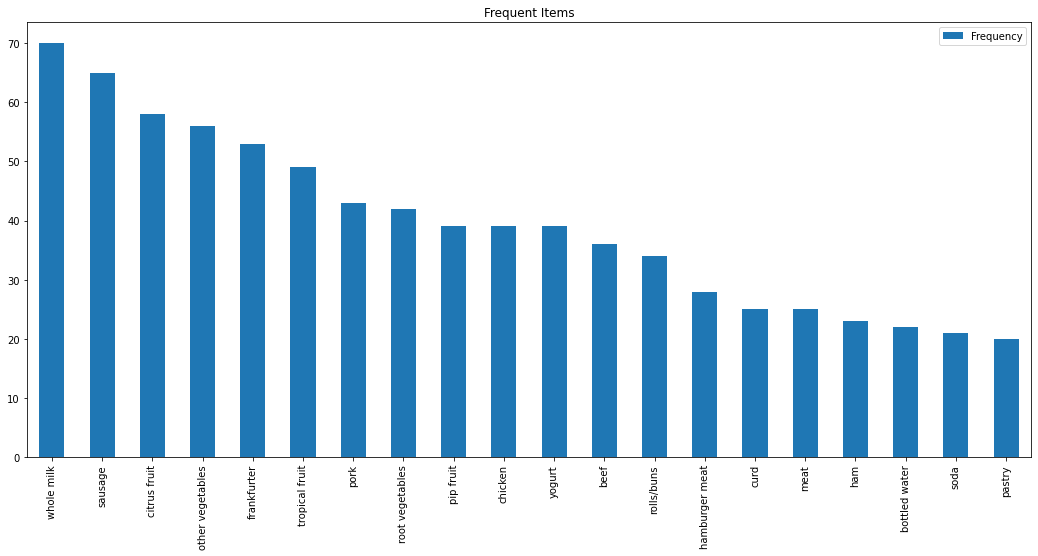

In [33]:
import matplotlib.pyplot as plt
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:20].plot(kind='bar',
                                                                                  figsize=(18,8),
                                                                                  title="Frequent Items")
plt.show()

In [38]:
freq_itemsets = apriori(ap, min_support=0.15, use_colnames=True)
freq_itemsets


,support,itemsets
0,0.255319,(beef)
1,0.156028,(bottled water)
2,0.276596,(chicken)
3,0.411348,(citrus fruit)
4,0.177305,(curd)
...,...,...
114,0.156028,"(pip fruit, whole milk, other vegetables, citr..."
115,0.163121,"(sausage, other vegetables, whole milk, citrus..."
116,0.170213,"(frankfurter, sausage, other vegetables, whole..."
117,0.156028,"(root vegetables, sausage, other vegetables, w..."


In [40]:
rules = association_rules(freq_itemsets, metric='lift',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(citrus fruit),0.255319,0.411348,0.177305,0.694444,1.688218,0.072280,1.926499
1,(citrus fruit),(beef),0.411348,0.255319,0.177305,0.431034,1.688218,0.072280,1.308833
2,(frankfurter),(beef),0.375887,0.255319,0.156028,0.415094,1.625786,0.060057,1.273164
3,(beef),(frankfurter),0.255319,0.375887,0.156028,0.611111,1.625786,0.060057,1.604863
4,(other vegetables),(beef),0.397163,0.255319,0.163121,0.410714,1.608631,0.061717,1.263701
...,...,...,...,...,...,...,...,...,...
417,"(whole milk, tropical fruit)","(sausage, other vegetables)",0.234043,0.255319,0.163121,0.696970,2.729798,0.103365,2.457447
418,(sausage),"(whole milk, other vegetables, tropical fruit)",0.460993,0.184397,0.163121,0.353846,1.918935,0.078115,1.262242
419,(other vegetables),"(sausage, whole milk, tropical fruit)",0.397163,0.184397,0.163121,0.410714,2.227335,0.089885,1.384053
420,(whole milk),"(sausage, other vegetables, tropical fruit)",0.496454,0.177305,0.163121,0.328571,1.853143,0.075097,1.225290


In [42]:
rules = rules[rules.lift>1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(citrus fruit),0.255319,0.411348,0.177305,0.694444,1.688218,0.072280,1.926499
1,(citrus fruit),(beef),0.411348,0.255319,0.177305,0.431034,1.688218,0.072280,1.308833
2,(frankfurter),(beef),0.375887,0.255319,0.156028,0.415094,1.625786,0.060057,1.273164
3,(beef),(frankfurter),0.255319,0.375887,0.156028,0.611111,1.625786,0.060057,1.604863
4,(other vegetables),(beef),0.397163,0.255319,0.163121,0.410714,1.608631,0.061717,1.263701
...,...,...,...,...,...,...,...,...,...
417,"(whole milk, tropical fruit)","(sausage, other vegetables)",0.234043,0.255319,0.163121,0.696970,2.729798,0.103365,2.457447
418,(sausage),"(whole milk, other vegetables, tropical fruit)",0.460993,0.184397,0.163121,0.353846,1.918935,0.078115,1.262242
419,(other vegetables),"(sausage, whole milk, tropical fruit)",0.397163,0.184397,0.163121,0.410714,2.227335,0.089885,1.384053
420,(whole milk),"(sausage, other vegetables, tropical fruit)",0.496454,0.177305,0.163121,0.328571,1.853143,0.075097,1.225290


In [44]:
rules.sort_values('lift',ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
356,"(whole milk, pip fruit)","(other vegetables, citrus fruit)",0.198582,0.226950,0.156028,0.785714,3.462054,0.110960,3.607565
361,"(other vegetables, citrus fruit)","(whole milk, pip fruit)",0.226950,0.198582,0.156028,0.687500,3.462054,0.110960,2.564539
347,"(other vegetables, citrus fruit)","(frankfurter, whole milk)",0.226950,0.219858,0.156028,0.687500,3.127016,0.106131,2.496454
342,"(frankfurter, whole milk)","(other vegetables, citrus fruit)",0.219858,0.226950,0.156028,0.709677,3.127016,0.106131,2.662727
386,"(frankfurter, whole milk)","(sausage, other vegetables)",0.219858,0.255319,0.170213,0.774194,3.032258,0.114079,3.297872
387,"(sausage, other vegetables)","(frankfurter, whole milk)",0.255319,0.219858,0.170213,0.666667,3.032258,0.114079,2.340426
355,"(whole milk, other vegetables, citrus fruit)",(pip fruit),0.191489,0.276596,0.156028,0.814815,2.945869,0.103063,3.906383
362,(pip fruit),"(whole milk, other vegetables, citrus fruit)",0.276596,0.191489,0.156028,0.564103,2.945869,0.103063,1.854819
416,"(tropical fruit, other vegetables)","(sausage, whole milk)",0.212766,0.269504,0.163121,0.766667,2.844737,0.105779,3.130699
413,"(sausage, whole milk)","(tropical fruit, other vegetables)",0.269504,0.212766,0.163121,0.605263,2.844737,0.105779,1.994326
